In [4]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io

In [5]:
def visualize_slices(processed_stack, preview_slices):

    # Determine the number of subplots needed
    num_slices = len(preview_slices)
    num_rows = int(np.ceil(np.sqrt(num_slices)))
    num_cols = int(np.ceil(num_slices / num_rows))
    
    # Create subplots
    fig, axs = plt.subplots(num_rows, num_cols, figsize=(12, 12))
    axs = axs.ravel()  # Flatten the axis array if necessary

    # Display each slice in its subplot
    for i, slice_idx in enumerate(preview_slices):
        slice_img = processed_stack[slice_idx, :, :]
        axs[i].imshow(slice_img, cmap='gray')
        axs[i].set_title(f'Slice {slice_idx}')
        axs[i].axis('off')  # Optional: remove axes for cleaner look

    # Adjust layout to prevent overlap
    plt.tight_layout()
    plt.show()

In [10]:
def compare_stacks(stacks, preview_slice):

    assert len(stacks) == 4, "Stacks list should consist of four timepoints."

    # Create subplots
    fig, axs = plt.subplots(2, 2, figsize=(12, 12))
    axs = axs.ravel()  # Flatten the axis array if necessary

    # Display each slice in its subplot
    for ii in range(len(stacks)):
        axs[ii].imshow(stacks[ii][preview_slice,:,:], cmap='gray')
        axs[ii].set_title(f'Stack {ii}, Slice {preview_slice}')
        axs[ii].axis('off')

    # Adjust layout to prevent overlap
    plt.tight_layout()
    plt.show()

def compare_mips(mips):

    assert len(mips) == 4, "Mips list should consist of four timepoints."

    # Create subplots
    fig, axs = plt.subplots(2, 2, figsize=(12, 12))
    axs = axs.ravel()  # Flatten the axis array if necessary

    # Display each slice in its subplot
    for ii in range(len(mips)):
        axs[ii].imshow(mips[ii], cmap='gray')
        axs[ii].set_title(f'MIP {ii}')
        axs[ii].axis('off')

In [7]:
stack_0 = io.imread('output/thresh_stack_0.tif')
stack_1 = io.imread('output/thresh_stack_1.tif')
stack_2 = io.imread('output/thresh_stack_2.tif')
stack_3 = io.imread('output/thresh_stack_3.tif')

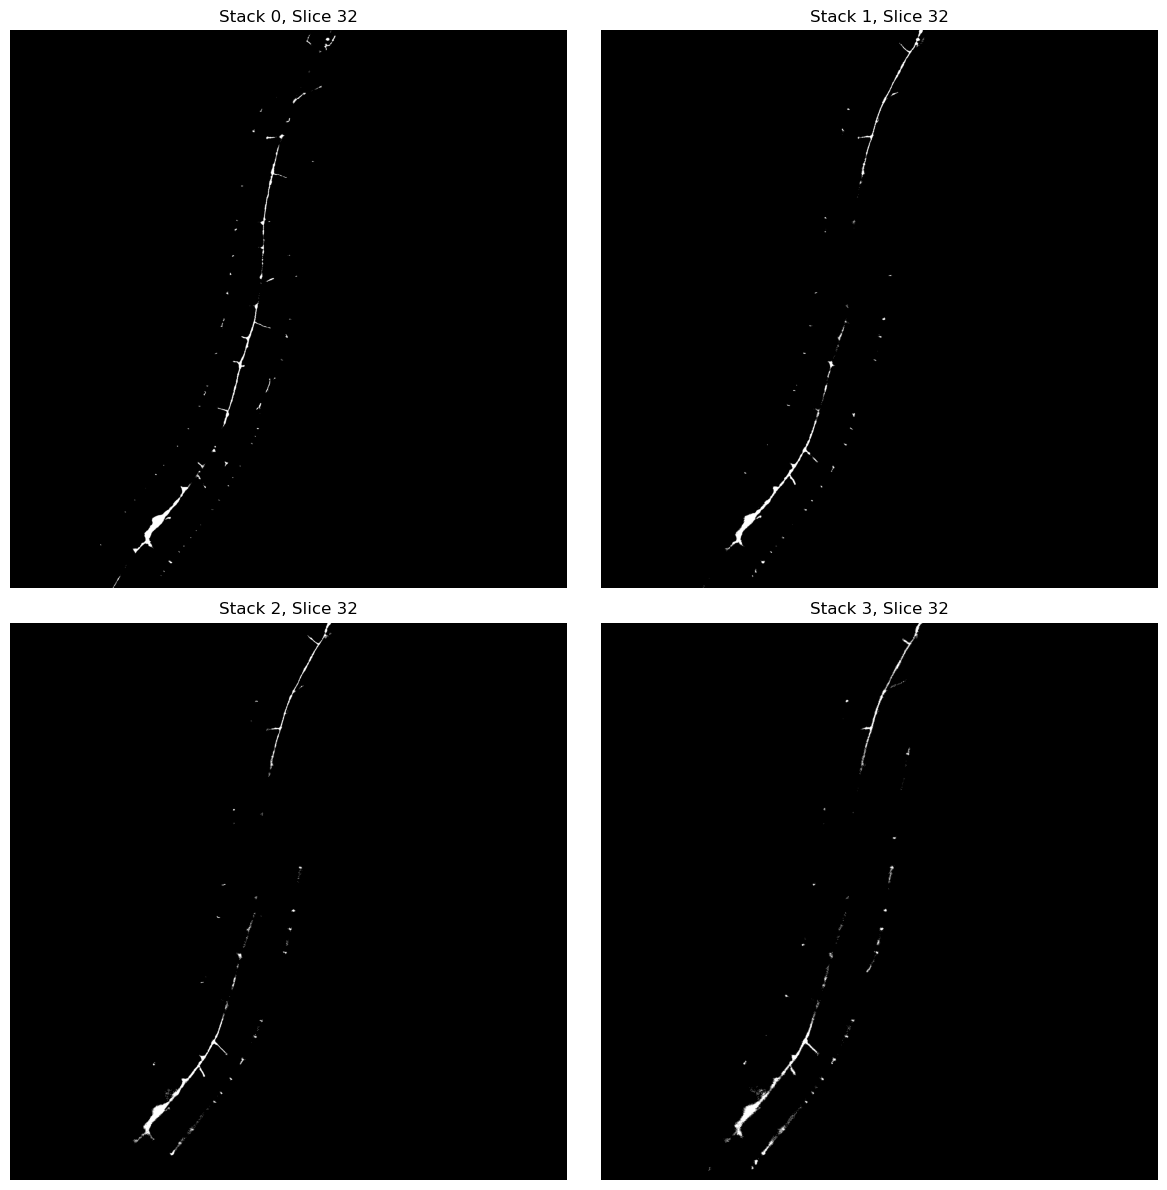

In [8]:
# Visualize the same slice across stacks
preview_stacks = [stack_0, stack_1, stack_2, stack_3]
compare_stacks(preview_stacks, preview_slice=32)

In [11]:
# Make MIPs from *binary* stacks
mip_0 = np.max(stack_0, axis=0)
mip_1 = np.max(stack_1, axis=0)
mip_2 = np.max(stack_2, axis=0)
mip_3 = np.max(stack_3, axis=0)

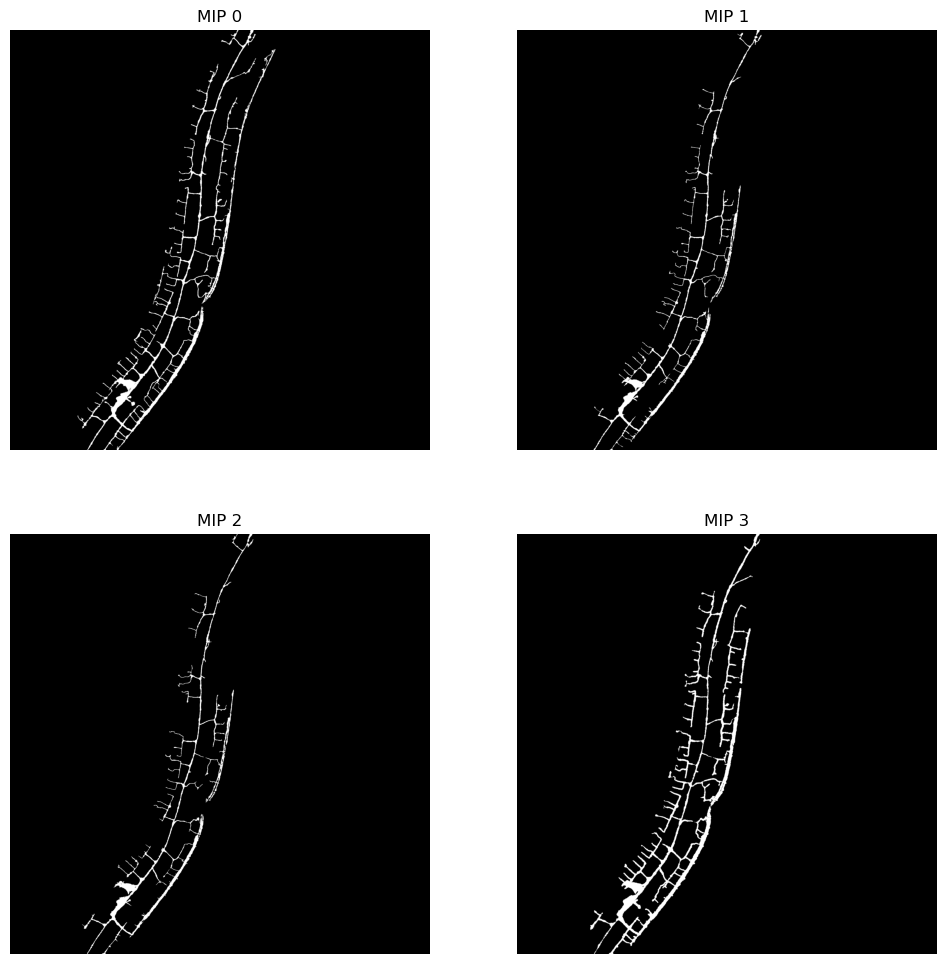

In [14]:
# Visualize the same slice across stacks
mips = [mip_0, mip_1, mip_2, mip_3]
compare_mips(mips)